In [37]:
import os
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv # Hide credentials
from pathlib import Path # For path to env file

In [14]:
env_path = Path('C:/Users/chanm/Desktop/PyIBM_database') / '.env'
load_dotenv(dotenv_path = env_path) # Access .env file with credentials

dsn_uri = os.getenv('Db2Uri')

connString = 'ibm_db_sa://' + dsn_uri

### Load SQL extension and establish connection w database

In [19]:
%reload_ext sql

In [24]:
%sql $connString

### Store dataset into pandas dataframe and create table on SQL server

In [ ]:
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

In [26]:
# Checking that data is stored correctly
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://vdc82550:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


### Exploring the data

In [30]:
# Counting the rows
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * ibm_db_sa://vdc82550:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


1
78


In [32]:
# Community areas in Chicago with a hardship index greater than 50.0
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50

 * ibm_db_sa://vdc82550:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


1
38


In [33]:
# Max hardship index
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data

 * ibm_db_sa://vdc82550:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


1
98.0


In [36]:
# Community area with the highest hardship index
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = (SELECT MAX(hardship_index) FROM chicago_socioeconomic_data)

 * ibm_db_sa://vdc82550:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


 * ibm_db_sa://vdc82550:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


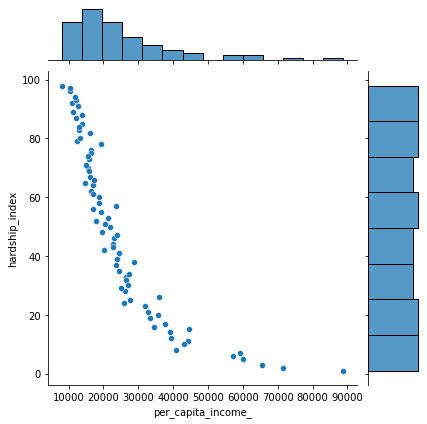

In [38]:
# Scatter plot of per_capita_income_ vs hardship_index

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())